In [17]:
# Import the important libraries 
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv('insurance.csv') # read dataset 

In [19]:
# Look at the sample data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# missing values in the columns
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
# Check for last rows in dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Perform EDA-

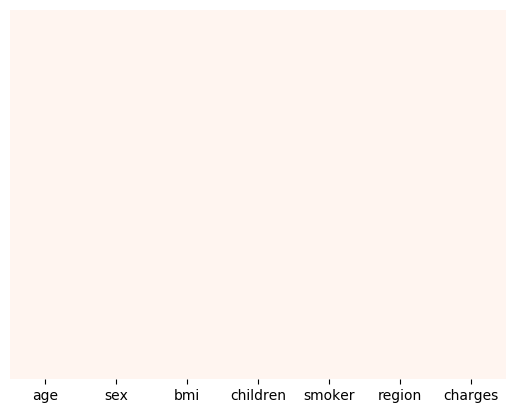

In [30]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Reds")
# Check Null values in visual form(NO Null Values)

In [31]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [32]:
#Check the info of the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df_region = df.groupby(by='region').mean() # groupby the region with charges 
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [34]:
df_age = df.groupby(by = 'age').mean() # groupby the age with charges 
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [37]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [38]:
df['sex'] = df['sex'].apply(lambda x:0 if x == 'female' else 1) # converting the categorical value into numericals

In [39]:
df['sex'].head()

0    0
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [41]:
df['smoker'] = df['smoker'].apply(lambda x:0 if x == 'no' else 1) # converting the categorical value into numericals

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [43]:
region_dummies = pd.get_dummies(df['region'],drop_first = True) # converting the categorical value into numericals

In [45]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [46]:
df = pd.concat([df, region_dummies], axis = 1) # adding the region dummies in dataset

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [48]:
df.drop(['region'], axis = 1, inplace =True) # dropping the region

In [49]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [51]:
df.describe() # statical summary of the data

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


# Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf231f74d0>,
      dtype=object)

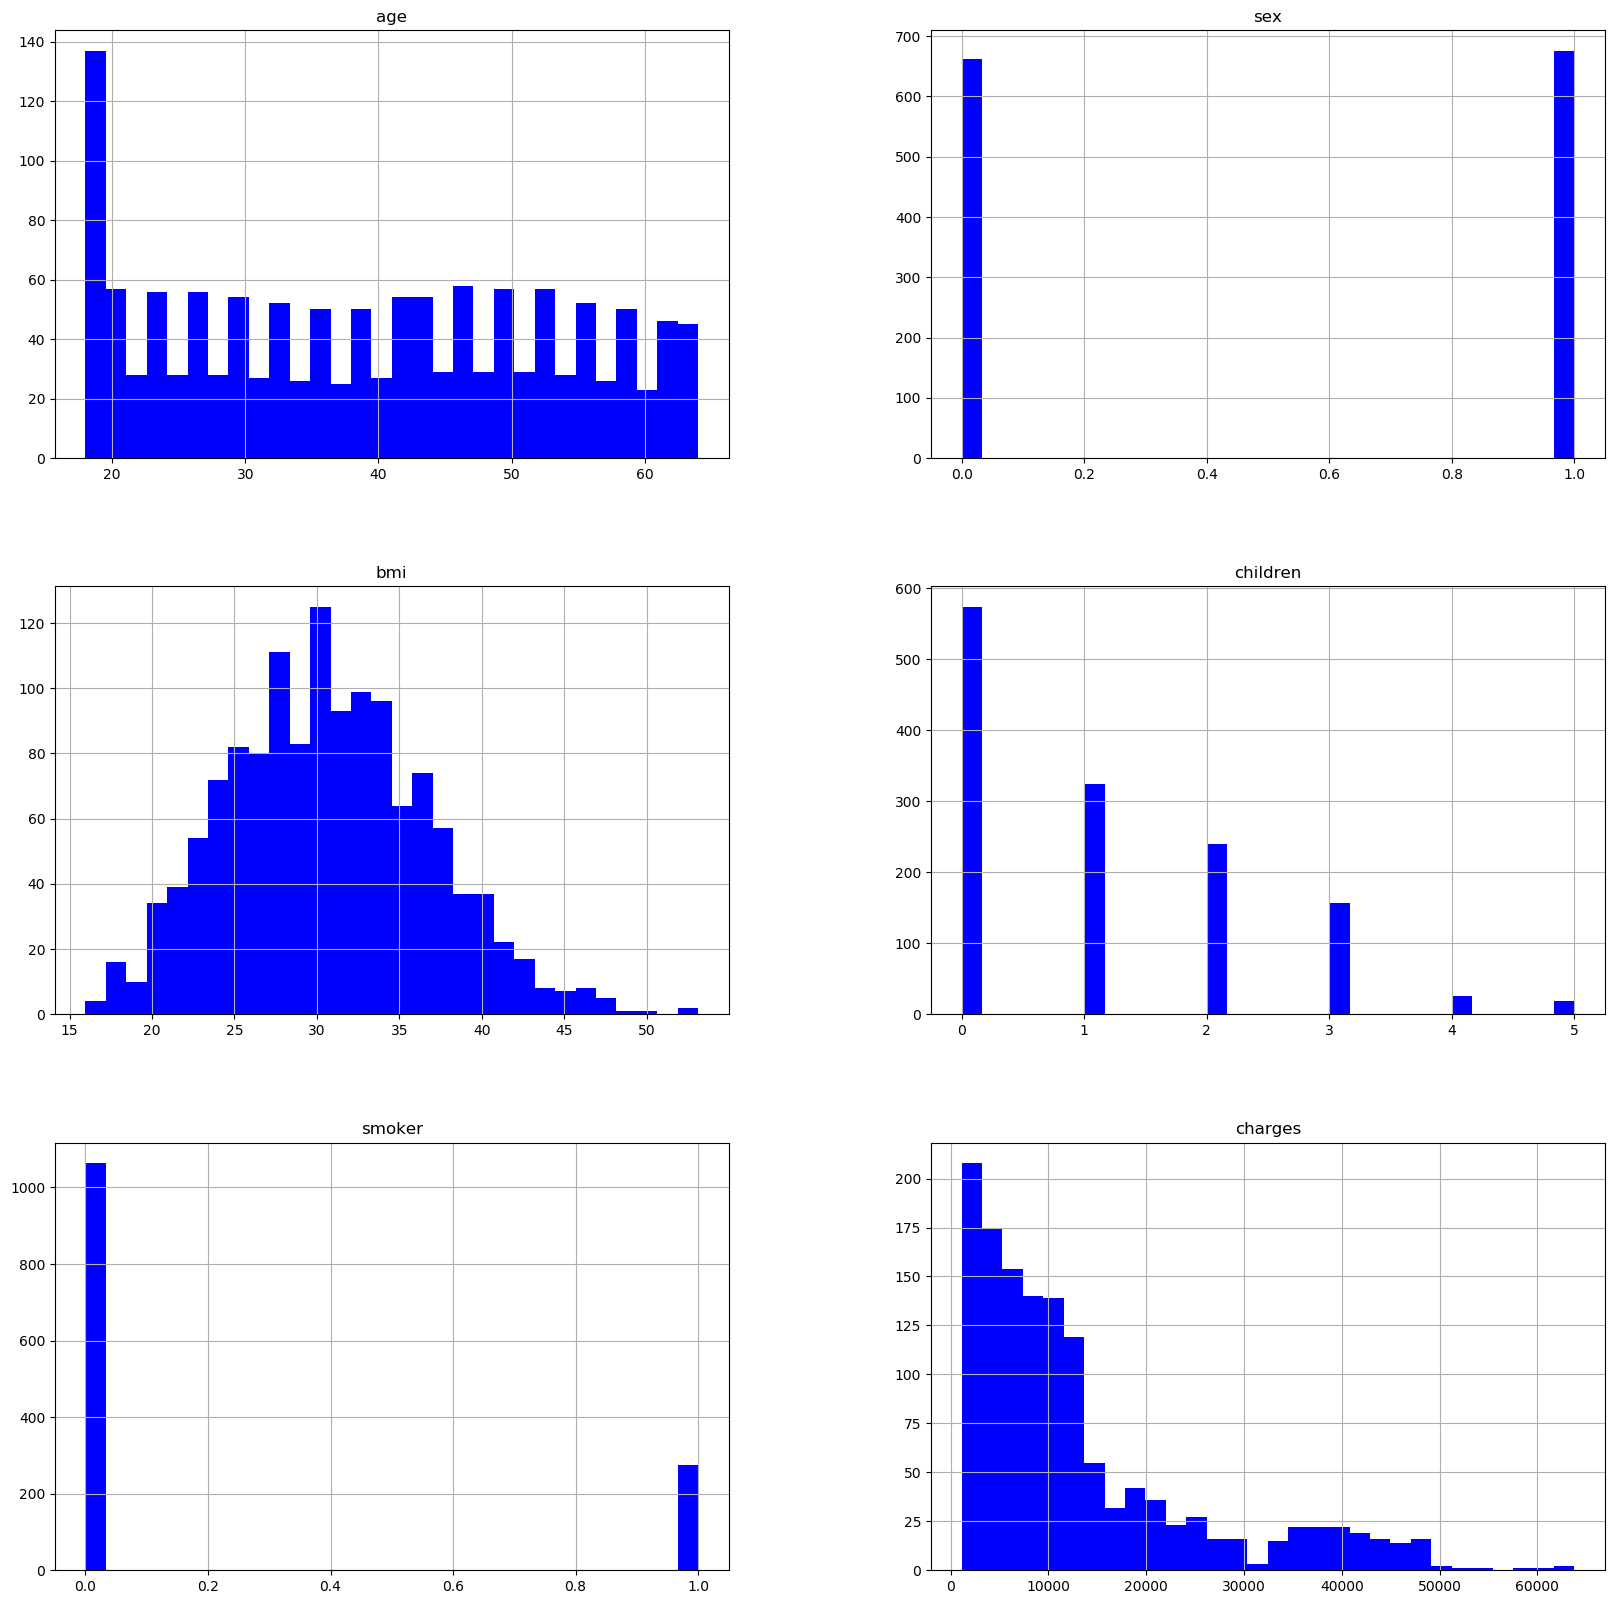

In [53]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins =30, figsize =(20,20), color = 'b')

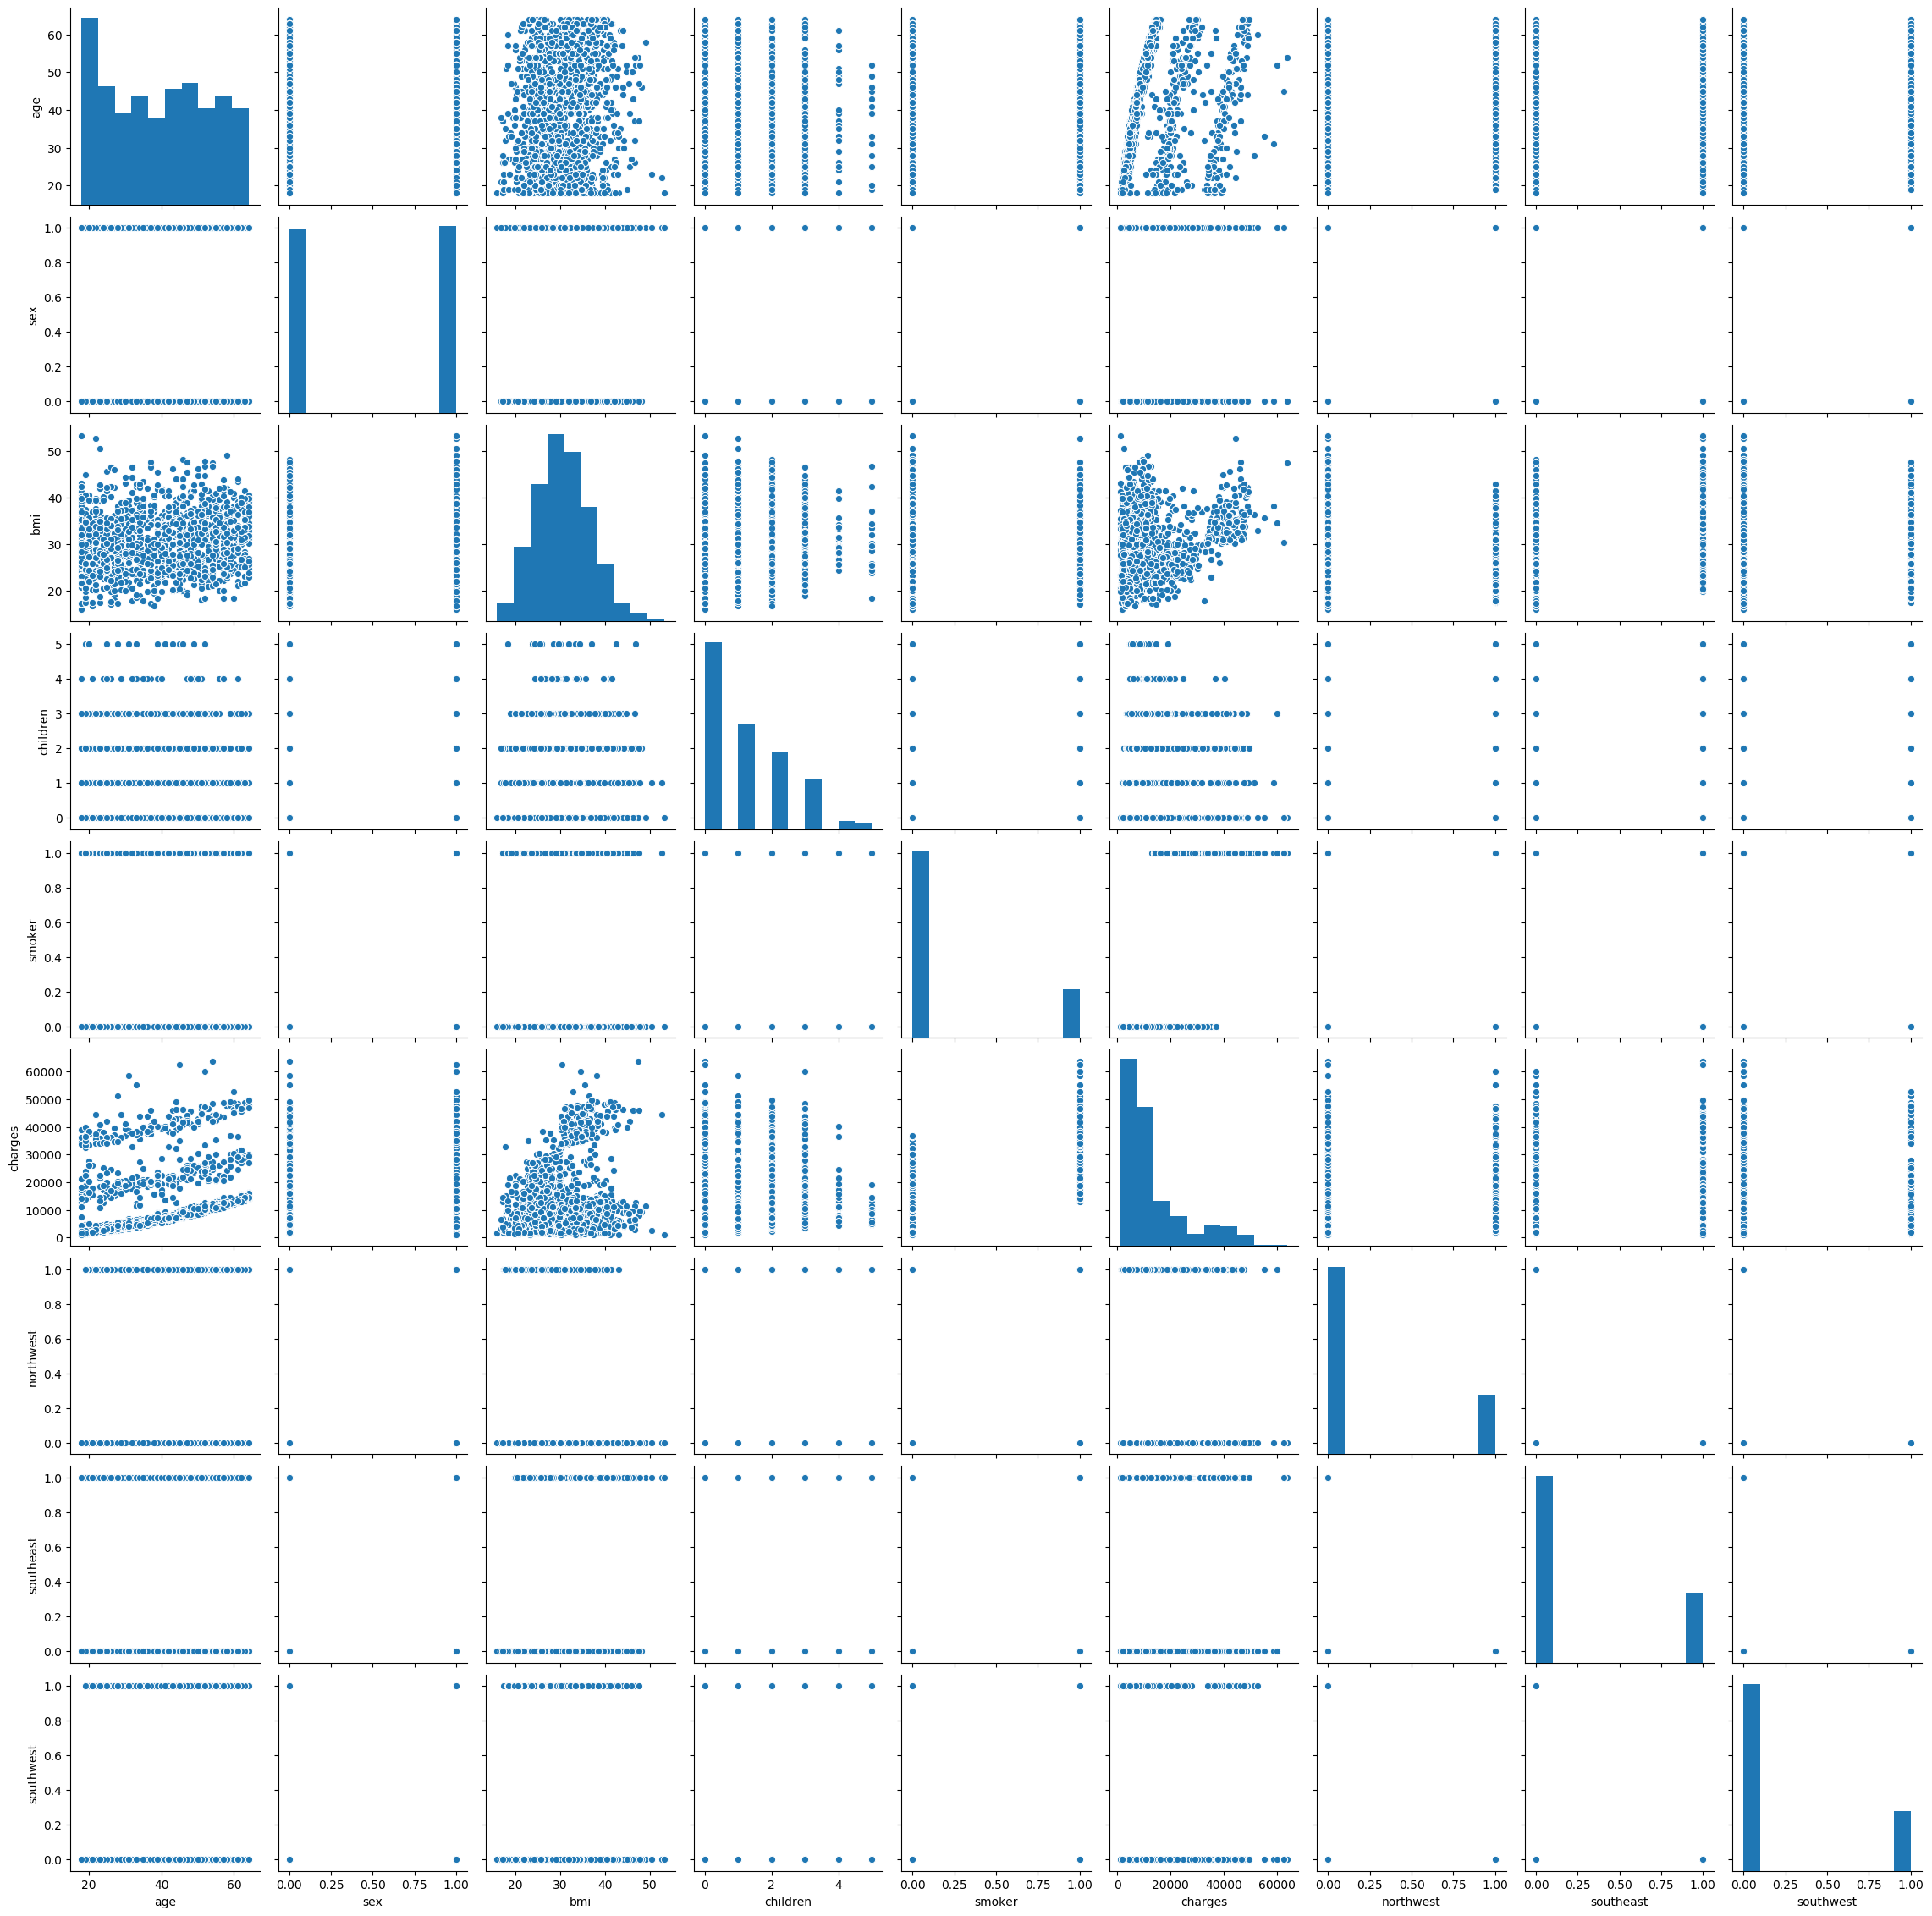

In [54]:
sns.pairplot(df)

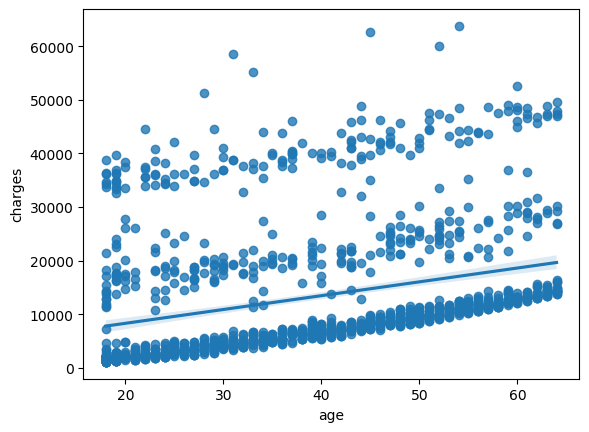

In [56]:
sns.regplot( x = 'age' , y = 'charges' , data = df)
plt.show()

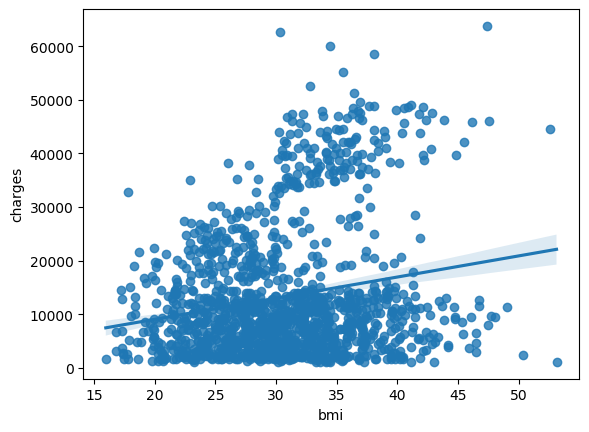

In [57]:
sns.regplot( x = 'bmi' , y = 'charges' , data = df)
plt.show()

In [64]:
corr = df.corr() 
corr# correlation

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


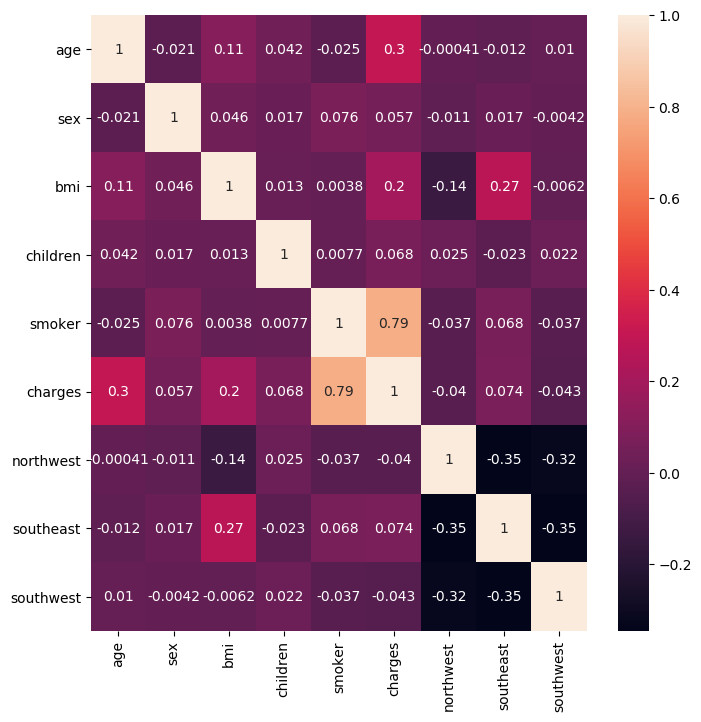

In [65]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot =True)

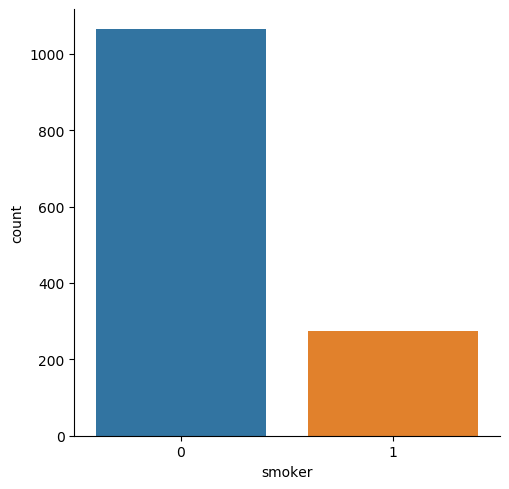

In [67]:
# Checking the same for smoker as well. The count of non smokers are more in the dataset
sns.catplot(x='smoker', kind="count", data= df);

# Creating Training & Test dataset

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [69]:
X = df.drop(columns =['charges'])
y = df['charges']

In [70]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [71]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [72]:
X.shape

(1338, 8)

In [73]:
y.shape

(1338,)

In [74]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [75]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [76]:
y 

array([16884.924 ,  1725.5522,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.36  ], dtype=float32)

In [77]:
y = y.reshape(-1,1)

In [80]:
y.shape

(1338, 1)

In [85]:
# scaling the data before feeding the model 
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Spliting the data into training and testing 

In [87]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2) # 80% for training and rest for test
X_train.shape , X_test.shape , y_train.shape , y_test.shape # Getting the shape 

((1070, 8), (268, 8), (1070, 1), (268, 1))

# Train & Test a linear regression model in SK-Learn

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy 

0.741335588423746

In [91]:
print('Linear Model Cofficient (m): ',regression_model_sklearn.coef_)
print('Linear Model Cofficient (c): ',regression_model_sklearn.intercept_)

Linear Model Cofficient (m):  [[ 0.29220173 -0.00512646  0.17088898  0.04786419  0.78125757 -0.01592619
  -0.0422468  -0.03262139]]
Linear Model Cofficient (c):  [-0.01474709]


In [92]:
y_predict = regression_model_sklearn.predict(X_test)

In [94]:
y_predict

array([[-2.91985217e-02],
       [ 1.42134237e+00],
       [ 3.12543094e-01],
       [-2.64247864e-01],
       [-7.97707200e-01],
       [-5.88256359e-01],
       [-6.30993724e-01],
       [ 1.40367603e+00],
       [-1.94325611e-01],
       [-4.21063840e-01],
       [ 2.41053119e-01],
       [-5.25390729e-02],
       [ 1.23994482e+00],
       [-4.33680147e-01],
       [-1.49431288e-01],
       [-4.61250067e-01],
       [-1.69320460e-02],
       [-7.04081237e-01],
       [ 1.58116317e+00],
       [-5.75411558e-01],
       [ 1.64212549e+00],
       [-7.95821965e-01],
       [-4.83913183e-01],
       [-6.31438971e-01],
       [-5.67820013e-01],
       [-2.34060690e-01],
       [-6.48898304e-01],
       [-3.82095516e-01],
       [-7.03066587e-01],
       [-1.00425661e+00],
       [-5.34903049e-01],
       [ 9.02874246e-02],
       [-5.29907405e-01],
       [-5.31136870e-01],
       [-6.81971192e-01],
       [-3.31512243e-01],
       [-7.78196096e-01],
       [ 1.27943516e+00],
       [-8.2

In [93]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig =scaler_y.inverse_transform(y_test)

In [95]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [99]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)

In [100]:
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [102]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6559.667 
MSE = 43029228.0 
MAE = 4374.578 
R2 = 0.741335591064993 
Adjusted R2 = 0.7333459568121743


# Train Linear learner using sagemaker

In [103]:
import sagemaker
import boto3 # SDK for python 

# create sagemaker session
sagemaker_session = sagemaker.Session()

bucket = 'sagemaker-practical-utkarsh' # naming the bucket 
prefix = 'linear_learner' #Subfolder in the bucket 

role = sagemaker.get_execution_role() # IAM role setting , execution role 
print(role)

arn:aws:iam::519145880970:role/service-role/AmazonSageMaker-ExecutionRole-20230325T150250


In [104]:
X_train.shape

(1070, 8)

In [105]:
y_train.shape

(1070, 1)

In [106]:
y_train = y_train[:,0]

In [107]:
y_train.shape

(1070,)

In [108]:
import io # deals with various input ouput data such as text ,binary,raw
import numpy as np 
import sagemaker.amazon.common as smac # sagemaker lib 
#converts the data into the numpy array to recordIO  format whuch is required by sagemaker liner learner 
buf = io.BytesIO() # Create in memmory byte array ,it increments 1 everytime you write it 
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) #reset back to zero 

0

In [109]:
import os 
# code to upload recordIO data to s3 
key = 'linear-train-data' # key refers name of the file 
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf) #uploads the data in record io format to s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)

print('uploaded training data location: {}'.format(s3_train_data)) #print training data location in s3

uploaded training data location: s3://sagemaker-practical-utkarsh/linear_learner/train/linear-train-data


In [110]:
X_test.shape

(268, 8)

In [111]:
y_train.shape

(1070,)

In [113]:
output_location = 's3://{}/{}/output'.format(bucket, prefix) # create a output placeholder in s3
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-practical-utkarsh/linear_learner/output


In [114]:
#this code is used to get the training container of sagemaker built-in algo.simply specifiy the name of the algo.

 # all regression model are named as estimator 

import boto3
from sagemaker.image_uris import retrieve

region_name = boto3.Session().region_name
container = retrieve("linear-learner", region_name)

In [115]:
linear = sagemaker.estimator.Estimator(container,
                                      role,
                                      instance_count=1,
                                      instance_type='ml.c4.xlarge',
                                      output_path=output_location,
                                      sagemaker_session=sagemaker_session,
                                      use_spot_instances=True,
                                      max_run=300,
                                      max_wait=600)

linear.set_hyperparameters(predictor_type='regressor',
                           mini_batch_size=5,
                           epochs=5,
                           num_models=32,
                           loss='absolute_loss')

linear.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2023-03-26-14-50-21-728


2023-03-26 14:50:22 Starting - Starting the training job...
2023-03-26 14:50:37 Starting - Preparing the instances for training...
2023-03-26 14:51:29 Downloading - Downloading input data...
2023-03-26 14:51:50 Training - Downloading the training image.........
2023-03-26 14:53:15 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/26/2023 14:53:23 INFO 140293985093440] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'a

# Deploy & Test the trained linear model

In [116]:
linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type ='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-03-26-15-01-37-778
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-03-26-15-01-37-778
INFO:sagemaker:Creating endpoint with name linear-learner-2023-03-26-15-01-37-778


-------!

In [117]:
from sagemaker.predictor import csv_serializer, json_deserializer

# set the serializer and deserializer types for the predictor object
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

# make a prediction on a single example
prediction = linear_regressor.predict(X_test[0], initial_args={'ContentType': 'text/csv'}) #datain text/CSV format

# print the prediction
print(prediction)


See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 0.013115212321281433}]}


In [118]:
result = linear_regressor.predict(X_test)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [121]:
result

{'predictions': [{'score': 0.013115212321281433},
  {'score': 1.1092619895935059},
  {'score': -0.17748306691646576},
  {'score': -0.25378847122192383},
  {'score': -0.9041051864624023},
  {'score': -0.7533024549484253},
  {'score': -0.72237229347229},
  {'score': 1.204245686531067},
  {'score': -0.3413715064525604},
  {'score': -0.4486258625984192},
  {'score': -0.03963932394981384},
  {'score': -0.2776201665401459},
  {'score': 0.950580358505249},
  {'score': -0.39411455392837524},
  {'score': -0.25968942046165466},
  {'score': -0.28069907426834106},
  {'score': -0.018541261553764343},
  {'score': -0.8034982681274414},
  {'score': 0.958050012588501},
  {'score': -0.6903679370880127},
  {'score': 1.4028342962265015},
  {'score': -0.6957740783691406},
  {'score': -0.5968176126480103},
  {'score': -0.6516687870025635},
  {'score': -0.8812707662582397},
  {'score': -0.27189022302627563},
  {'score': -0.963686466217041},
  {'score': -0.5472003221511841},
  {'score': -0.7897601127624512},


In [119]:
predictions = np.array([r['score'] for r in result['predictions']])

In [120]:
predictions

array([ 1.31152123e-02,  1.10926199e+00, -1.77483067e-01, -2.53788471e-01,
       -9.04105186e-01, -7.53302455e-01, -7.22372293e-01,  1.20424569e+00,
       -3.41371506e-01, -4.48625863e-01, -3.96393239e-02, -2.77620167e-01,
        9.50580359e-01, -3.94114554e-01, -2.59689420e-01, -2.80699074e-01,
       -1.85412616e-02, -8.03498268e-01,  9.58050013e-01, -6.90367937e-01,
        1.40283430e+00, -6.95774078e-01, -5.96817613e-01, -6.51668787e-01,
       -8.81270766e-01, -2.71890223e-01, -9.63686466e-01, -5.47200322e-01,
       -7.89760113e-01, -7.69598961e-01, -6.20712280e-01, -1.05704665e-01,
       -5.21741748e-01, -8.66527557e-01, -6.52028441e-01, -3.50313365e-01,
       -6.99125171e-01,  1.09275234e+00, -7.65560150e-01, -8.57902288e-01,
       -7.31437951e-02, -3.82533997e-01, -5.75658828e-02,  1.03034699e+00,
       -7.97757864e-01, -4.09426033e-01, -3.57419342e-01, -4.43829149e-01,
        9.83825564e-01,  7.32561588e-01, -3.33061993e-01, -1.48774922e-01,
       -1.42649993e-01, -

In [122]:
predictions.shape

(268,)

In [124]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig =scaler_y.inverse_transform(y_test)

In [125]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [126]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 7402.882 
MSE = 54802657.38351964 
MAE = 3980.785462782221 
R2 = 0.6705611914207406 
Adjusted R2 = 0.6603854753256282


In [128]:
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2023-03-26-15-01-37-778
INFO:sagemaker:Deleting endpoint with name: linear-learner-2023-03-26-15-01-37-778


In [129]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 7.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 36.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 3.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [183]:
# Create a sequential model
ANN_model = keras.Sequential()

# Add dense layers with ReLU activation and batch normalization
ANN_model.add(Dense(50, input_dim= 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
#BatchNormalization()
ANN_model.add(Activation('relu'))
#ANN_model.add(Dense(100))
#BatchNormalization()
ANN_model.add(Dropout(0.25))
ANN_model.add(Dense(150))
#BatchNormalization()
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.25))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

# Compile the model with mean squared error loss and Adam optimizer
ANN_model.compile(loss='mse', optimizer='adam')

# Print model summary
ANN_model.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                450       
                                                                 
 activation_43 (Activation)  (None, 50)                0         
                                                                 
 dense_61 (Dense)            (None, 150)               7650      
                                                                 
 activation_44 (Activation)  (None, 150)               0         
                                                                 
 dropout_18 (Dropout)        (None, 150)               0         
                                                                 
 dense_62 (Dense)            (None, 150)               22650     
                                                                 
 activation_45 (Activation)  (None, 150)             

In [184]:
# Set the number of epochs and batch size
epochs = 100
batch_size = 20

# Train the model using the fit method
epochs_hist = ANN_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 0.5163 - val_loss: 0.2296
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2598 - val_loss: 0.2104
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2379 - val_loss: 0.1760
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2150 - val_loss: 0.1756
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1937 - val_loss: 0.1752
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1716 - val_loss: 0.1686
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1725 - val_loss: 0.1700
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1719 - val_loss: 0.1848
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1572 - val_loss: 0.1792
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1686 - val_loss: 0.1723
Epoch 11/

In [185]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1- result
print("Accuracy of ANN model: {:.2f}%".format(accuracy_ANN))

9/9 [==============================] - 1s 2ms/step - loss: 0.2311
Accuracy of ANN model: 0.77%


In [186]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

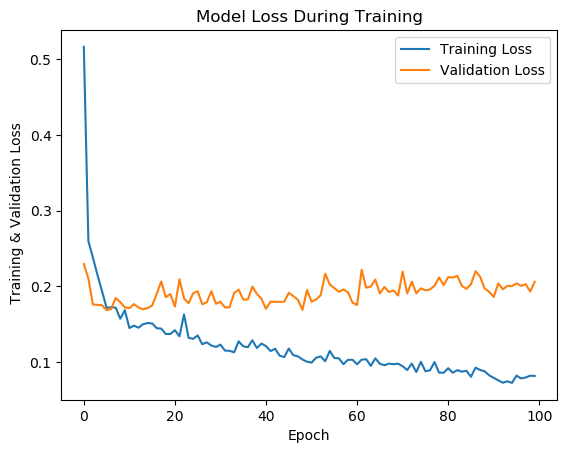

In [187]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel(' Training & Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

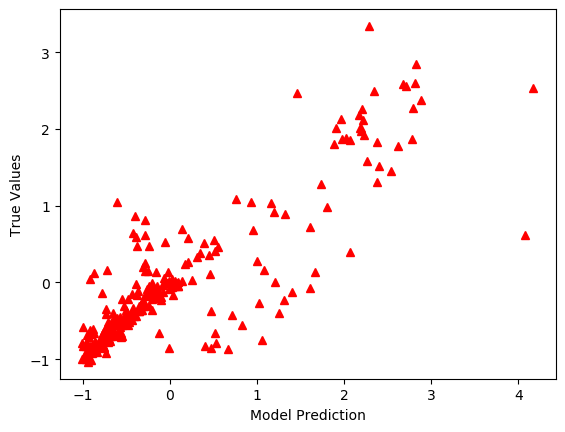

In [138]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel("True Values")

In [139]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

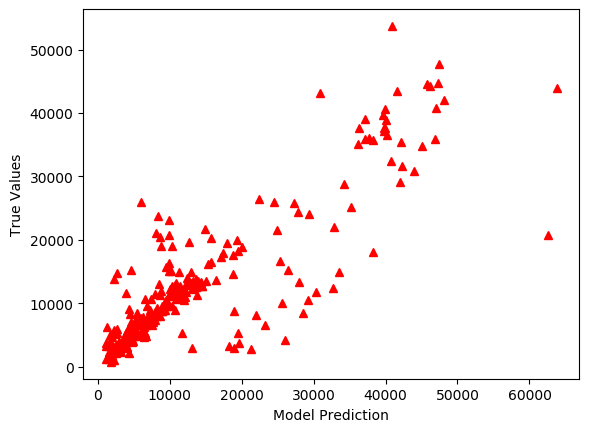

In [140]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel("True Values")

In [141]:
k= X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6596.735 
MSE = 43516908.0 
MAE = 3636.897 
R2 = 0.7384039559135951 
Adjusted R2 = 0.7303237692236675
